In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
x = np.arange(-5,5,0.1)

# Sigmoid
=$ 1\over1+e^x$  
단점: gradient vanishing x = 10, x= 20 값이 같음, zero-centered하지 않음,

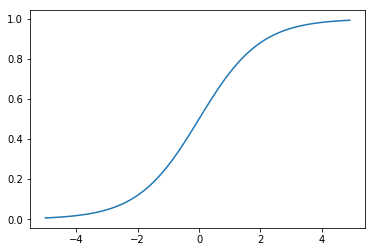

In [3]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

y= list(map(sigmoid,x))
plt.plot(x,y)

# tanh
=$e^{2x}-1\over e^{2x}+1 $  

=$2sigmoid(2x)+1$  

sigmoid의 zero-centered하지 못한점을 해결

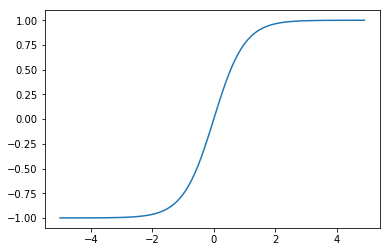

In [4]:
def tanh(x):
  return 2*sigmoid(2*x)-1

y= list(map(tanh,x))
plt.plot(x,y)

# Relu
=$max(0,x)$  
계산 효율 좋음 ,zero-centered하지 못함 ,x<0에서 saturated됨  
특정 양수에 수렴 안함

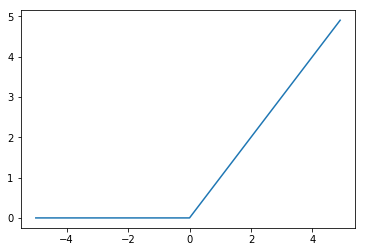

In [5]:
def Relu(x):
  return max(0,x)

y= list(map(Relu,x))
plt.plot(x,y)

# Leaky Relu  
=$max(ax,x)$  
$x<0$ 구간에서 다시 기울기를 가질 가능성을 가짐, 일반적으로 ReLU보다 성능이 좋다.

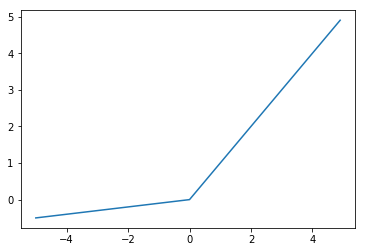

In [6]:
def LeakyRelu(x, alpha = 0.1):
  return max(alpha*x,x)

y= list(map(LeakyRelu,x))
plt.plot(x,y)

# RReLu Randomized leaky ReLU  
Leaky ReLU의 $a$를 무작위로 선택하고 테스트시 평균으로 사용한다  
over fitting 방지

alpha is 0.6342668548558285


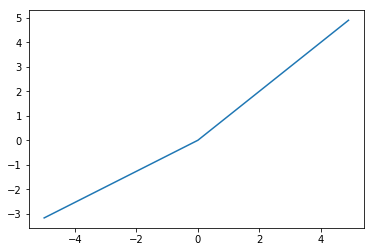

In [7]:
from random import *
alpha = random()
print('alpha is', alpha)
def RReLU(x,alpha = alpha):
    return max(alpha*x,x)

y = list(map(RReLU,x))
plt.plot(x,y)

# PReLU Parametric leaky ReLU
$a$가 train동안 학습된다.  
대규모에서 크게 성능 좋아짐, 소규모에서 overfitting 위험

In [8]:
## ??

# ELU
$x$  ,  if $x>0$  
$a(e^x-1)$   ,  if $x<=0$  
exp를 사용하기 때문에 계산이 느려짐, 전체적인 성능 증가

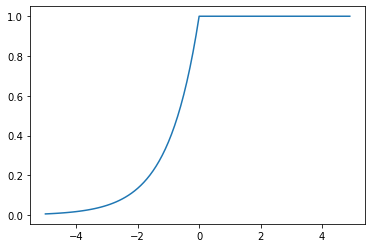

In [5]:
def elu(x,alpha=1):
  if x>0:
    return x
  else:
    return alpha*(math.exp(x)-1)

def elu2(x,alpha=1):
  if x>0:
    return 1
  else:
    return alpha*(math.exp(x))

y= list(map(elu2,x))
plt.plot(x,y)

# Activation 선호도  
ELU > LeakyReLU > ReLU > tanh > sigmoid  
속도: LeakyReLU > ELU  
overfitting: PReLU  
big train set: PReLU